<a href="https://colab.research.google.com/github/Sauleh-repo/Deep_Learning/blob/main/MNIST_classificiation_using_CNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a NN from Scratch <br>
Classifies images of handwritten digits

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer

Saving kaggle.json to kaggle.json


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import zipfile

In [ ]:
with zipfile.ZipFile('digit-recognizer.zip', 'r') as zip_ref:
  zip_ref.extractall('digits')

In [ ]:
data = pd.read_csv('digits/train.csv')

In [ ]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)

In [ ]:
print(data[:10])

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]]


In [ ]:
m, n = data.shape
np.random.shuffle(data)

In [ ]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def ReLU(Z):
  return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X)+ b1
  A1 =ReLU(Z1)
  Z2 = W2.dot(A1) +b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [ ]:
def deriv_ReLU(Z):
  return Z > 0

In [ ]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2

  return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y)/ Y.size

In [ ]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.1)

Iteration:  0
[1 3 1 ... 3 3 6] [2 3 3 ... 1 9 9]
0.10673170731707317
Iteration:  10
[8 8 8 ... 1 2 6] [2 3 3 ... 1 9 9]
0.2241219512195122
Iteration:  20
[8 8 8 ... 1 2 4] [2 3 3 ... 1 9 9]
0.2976341463414634
Iteration:  30
[8 8 8 ... 1 2 4] [2 3 3 ... 1 9 9]
0.3499024390243902
Iteration:  40
[8 8 0 ... 1 2 4] [2 3 3 ... 1 9 9]
0.40692682926829266
Iteration:  50
[8 8 0 ... 1 2 4] [2 3 3 ... 1 9 9]
0.46682926829268295
Iteration:  60
[8 8 0 ... 1 2 4] [2 3 3 ... 1 9 9]
0.5107804878048781
Iteration:  70
[8 8 0 ... 1 2 4] [2 3 3 ... 1 9 9]
0.5457073170731708
Iteration:  80
[8 8 0 ... 1 9 4] [2 3 3 ... 1 9 9]
0.5733414634146341
Iteration:  90
[8 8 0 ... 1 9 4] [2 3 3 ... 1 9 9]
0.5965609756097561
Iteration:  100
[8 8 0 ... 1 9 4] [2 3 3 ... 1 9 9]
0.6169268292682927
Iteration:  110
[8 8 0 ... 1 9 4] [2 3 3 ... 1 9 9]
0.6357317073170732
Iteration:  120
[8 3 0 ... 1 9 9] [2 3 3 ... 1 9 9]
0.6532439024390244
Iteration:  130
[8 3 0 ... 1 9 9] [2 3 3 ... 1 9 9]
0.6675853658536586
Iteration:  14

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)
  return predictions

def test_prediction(index, W1, b1, w2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = Y_train[index]
  print("Prediction:", prediction)
  print("Label:", label)

  current_image = current_image.reshape((28,28))*255
  plt.gray()
  plt.imshow(current_image, interpolation = 'nearest')
  plt.show()

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 1 8 1 3 3 5 5 9 7 5 8 9 1 3 6 2 7 9 0 1 3 3 6 3 3 1 0 2 4 6 3 3 7 0 3 8
 0 1 9 5 1 9 6 3 7 8 9 7 6 1 1 0 1 9 8 8 3 4 1 3 7 3 6 4 5 9 3 2 7 3 6 3 0
 0 4 1 4 4 3 3 1 2 9 4 8 8 4 4 9 1 4 7 3 1 6 3 0 7 1 1 9 8 7 4 9 0 0 0 3 8
 0 4 4 1 5 0 0 8 0 1 2 9 4 4 7 7 9 3 1 3 2 7 6 5 8 0 3 1 1 1 5 7 0 0 0 7 2
 2 5 4 1 0 4 9 2 4 9 9 2 0 2 4 7 2 8 9 7 1 6 2 2 7 3 7 0 8 1 7 0 6 6 1 4 0
 2 9 1 8 6 5 6 3 1 1 6 6 0 7 6 5 6 1 0 9 4 9 5 3 4 9 8 8 3 4 2 0 7 3 9 4 9
 7 9 7 6 7 3 0 9 8 0 1 6 6 3 3 3 3 0 2 3 5 9 5 6 9 9 5 8 3 2 5 5 4 1 2 3 9
 1 7 9 5 0 1 1 7 8 1 2 6 9 8 4 1 5 6 8 8 1 3 6 3 6 3 7 0 3 0 6 3 6 9 4 9 4
 5 2 8 5 0 2 6 0 1 8 0 1 7 6 8 6 4 7 0 6 6 0 8 9 3 3 1 0 0 0 3 8 5 6 8 4 1
 9 6 3 2 7 4 3 3 3 5 9 9 3 0 1 0 9 5 6 6 1 2 2 1 3 5 6 5 3 6 0 5 7 9 9 5 5
 3 4 1 4 4 8 3 8 7 3 9 0 5 5 4 5 8 4 9 9 7 1 2 0 4 9 5 3 8 6 6 2 9 1 1 4 9
 4 0 3 1 9 3 9 5 6 8 4 7 0 8 7 0 2 6 8 9 4 4 3 7 4 1 3 2 2 5 2 8 7 4 8 3 1
 2 1 8 4 4 9 5 2 6 7 7 2 5 2 0 9 7 1 4 7 4 8 1 6 7 0 2 6 1 1 7 5 2 3 3 2 1
 5 9 3 3 2 7 4 9 1 6 8 4 

np.float64(0.858)

Prediction: [4]
Label: 4


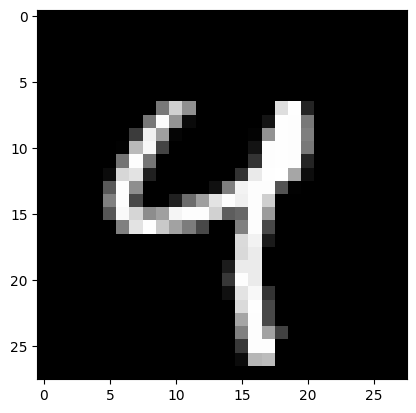

In [ ]:
test_prediction(21, W1, b1, W2, b2)